In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-05-17 10:17:19.199764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747477039.449890      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747477039.522395      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configuration
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 3

In [3]:
def create_model():
    """Create and return the CNN model architecture"""
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Fourth Convolutional Block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

In [17]:
def prepare_data():
    """Prepare and augment the training data"""
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # Use 20% for validation if you don't have separate validation set
    )

    data_dir = '/kaggle/input/lettuce-plant-disease-dataset/lettuce'
    
    train_generator = train_datagen.flow_from_directory(
        os.path.join(data_dir, 'train'),
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'  # Only if using validation_split
    )
    
    validation_generator = train_datagen.flow_from_directory(
        os.path.join(data_dir, 'valid'),
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'  # Only if using validation_split
    )
    
    return train_generator, validation_generator


In [19]:
def plot_training_history(history):
    """Plot training history"""
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

Found 1891 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1747477511.623969     102 service.cc:148] XLA service 0x7ad2d800aa70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747477511.625078     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747477511.625099     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747477512.230109     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/60 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4375 - loss: 1.8451  

I0000 00:00:1747477519.925045     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.5982 - loss: 1.5844
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_model.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 856ms/step - accuracy: 0.5989 - loss: 1.5779 - val_accuracy: 0.3333 - val_loss: 2.9773
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.7123 - loss: 0.7414
Epoch 2: val_accuracy did not improve from 0.33333
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 599ms/step - accuracy: 0.7123 - loss: 0.7412 - val_accuracy: 0.3111 - val_loss: 1.5234
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.7191 - loss: 0.7037
Epoch 3: val_accuracy improved from 0.33333 to 0.35556, saving model to best_model.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 601ms/step - accuracy: 0.7193 - loss: 0.7037 - val_accuracy: 0.3556 - val_loss: 1.7805
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7429 - loss: 0.6781
Epoch 4: val_accuracy improved from 0.35556 to 0.44444, saving model to best_model.h5
60/60 ━

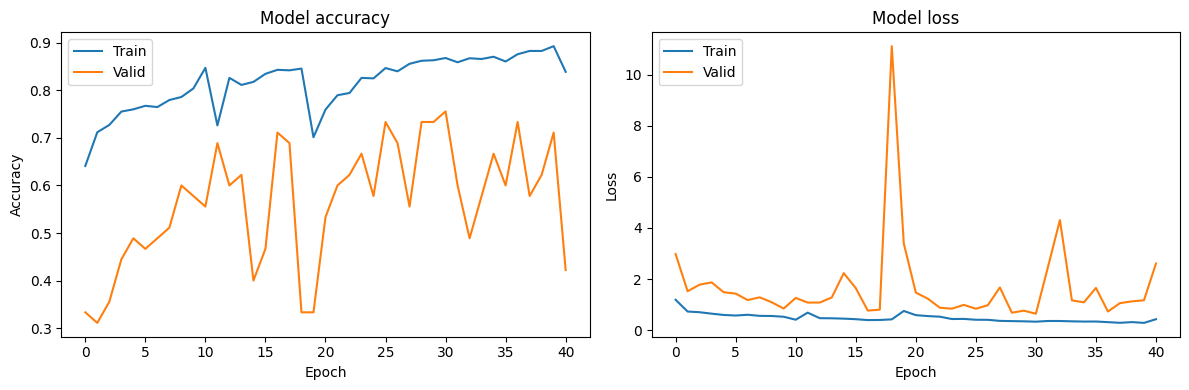

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.7389 - loss: 0.8044

Validation Accuracy: 73.33%

Model saved successfully!


In [20]:
def main():
    # Create the model
    model = create_model()
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Prepare the data
    train_generator, validation_generator = prepare_data()
    
    # Model checkpoint callback
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    
    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=[checkpoint_callback, early_stopping]
    )
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate the model
    evaluation = model.evaluate(validation_generator)
    print(f"\nValidation Accuracy: {evaluation[1]*100:.2f}%")
    
    # Save the model - in Kaggle, this will save to the output directory
    model.save('lettuce_disease_model.h5')
    print("\nModel saved successfully!")

if __name__ == "__main__":
    main()

In [24]:
# Load the lettuce disease model for your main usage
main_model = tf.keras.models.load_model('/kaggle/working/lettuce_disease_model.h5')

# Convert the best model to TFLite (for deployment)
best_model = tf.keras.models.load_model('/kaggle/working/best_model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/kaggle/working/best_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Verify both models are loaded correctly
print("Main model (lettuce_disease_model.h5) summary:")
main_model.summary()

print("\nBest model (best_model.h5) summary:")
best_model.summary()

# Create zip file containing both
import zipfile
with zipfile.ZipFile('/kaggle/working/model_package.zip', 'w') as zipf:
    zipf.write('/kaggle/working/lettuce_disease_model.h5')
    zipf.write('/kaggle/working/best_model.h5') 
    zipf.write('/kaggle/working/best_model.tflite')
    if os.path.exists('/kaggle/working/training_history.png'):
        zipf.write('/kaggle/working/training_history.png')

print("\nFiles prepared:")
print("- lettuce_disease_model.h5 (your main model)")
print("- best_model.h5 (best validation performance)")
print("- best_model.tflite (converted best model)")
print("- model_package.zip (all files bundled)")

Saved artifact at '/tmp/tmpjmgd2mdg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135049744620944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049744613456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745479824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745478480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745479056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745481168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745465616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745466960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745466384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049745467536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1350497454661

W0000 00:00:1747480023.036884      35 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747480023.036924      35 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


Main model (lettuce_disease_model.h5) summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,268,805 (73.50 MB)

 Trainable params: 19,266,819 (73.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)


Best model (best_model.h5) summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,268,805 (73.50 MB)

 Trainable params: 19,266,819 (73.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)


Files prepared:
- lettuce_disease_model.h5 (your main model)
- best_model.h5 (best validation performance)
- best_model.tflite (converted best model)
- model_package.zip (all files bundled)


In [25]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/kaggle/working/best_model.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('best_model2.tflite', 'wb') as f:
    f.write(tflite_model)

# Download the file (click the output to download)
from IPython.display import FileLink
FileLink('best_model2.tflite')

Saved artifact at '/tmp/tmpi0k2t698'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135047914013328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135047914023312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135047914015248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049746030928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135047914021776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135047914028304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049746032272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049746025168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049746024208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135049746022480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1350497460240

W0000 00:00:1747480328.555640      35 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747480328.555678      35 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


/kaggle/working/best_model2.tflite

In [26]:
import tensorflow as tf
from IPython.display import FileLink



# 2. Create download links for all files
print("Click to download models:")
display(FileLink('best_model.h5', result_html_prefix='H5 Best Model: '))
display(FileLink('lettuce_disease_model.h5', result_html_prefix='H5 Final Model: ')) 
display(FileLink('best_model.tflite', result_html_prefix='TFLite Model: '))

# 3. Optional: Create zip with all files
import zipfile
with zipfile.ZipFile('all_models.zip', 'w') as zipf:
    zipf.write('best_model.h5')
    zipf.write('lettuce_disease_model.h5')
    zipf.write('best_model.tflite')
    
print("\nOr download everything together:")
display(FileLink('all_models.zip', result_html_prefix='All Models Zip: '))

Click to download models:


/kaggle/working/best_model.h5

/kaggle/working/lettuce_disease_model.h5

/kaggle/working/best_model.tflite


Or download everything together:


/kaggle/working/all_models.zip


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/Bacterial/augmented_36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


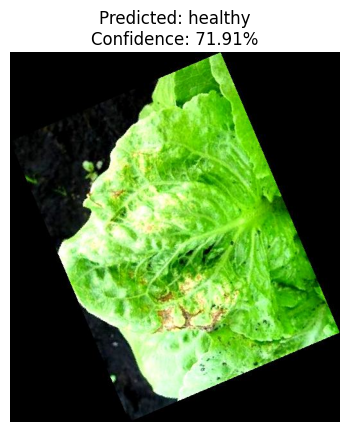


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/Bacterial/ba28_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


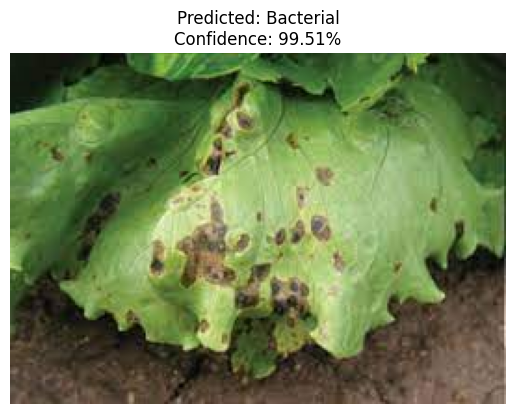


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/Bacterial/augmented_49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


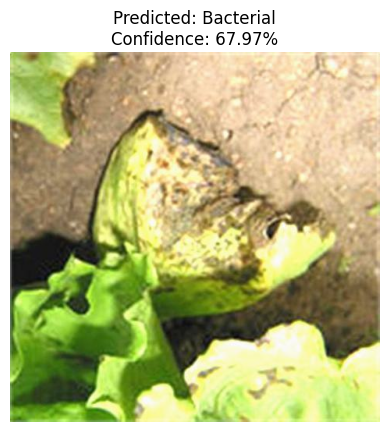


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/fungal/augmented_36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


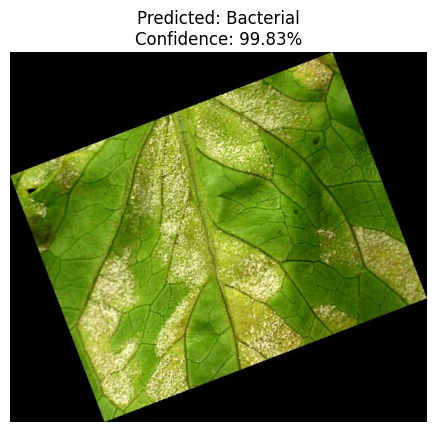


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/fungal/augmented_49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


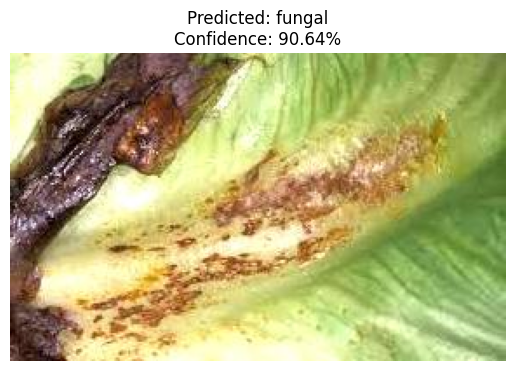


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/fungal/augmented_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


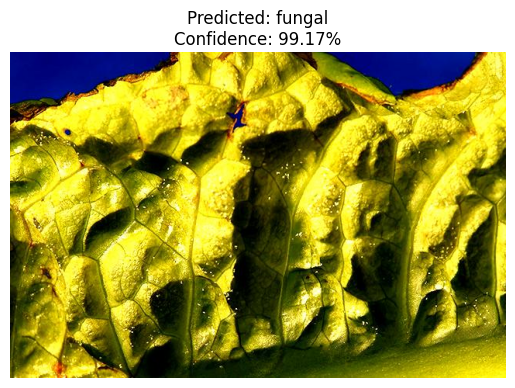


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/healthy/augmented_36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


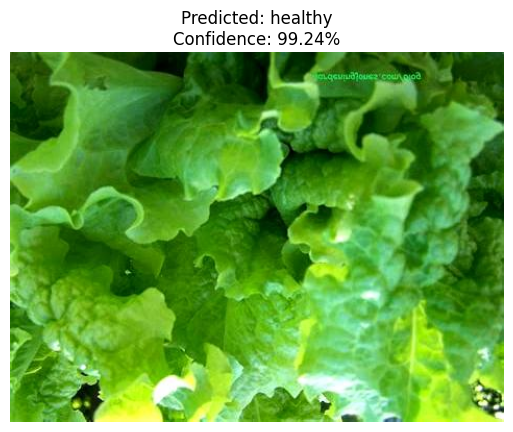


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/healthy/augmented_49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


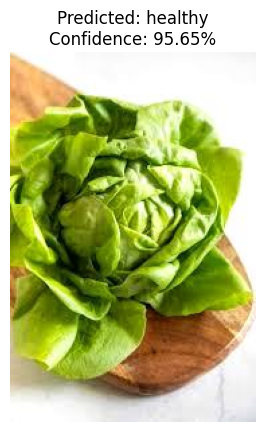


Testing: /kaggle/input/lettuce-plant-disease-dataset/lettuce/test/healthy/augmented_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


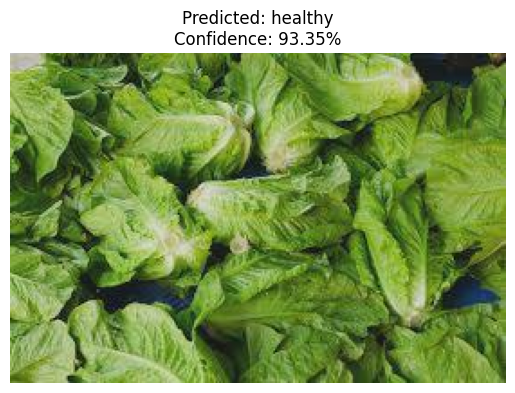


Test Summary:
Image: augmented_36.jpg
True: Bacterial, Predicted: healthy
Confidence: 71.91%
-----
Image: ba28_3.png
True: Bacterial, Predicted: Bacterial
Confidence: 99.51%
-----
Image: augmented_49.jpg
True: Bacterial, Predicted: Bacterial
Confidence: 67.97%
-----
Image: augmented_36.jpg
True: fungal, Predicted: Bacterial
Confidence: 99.83%
-----
Image: augmented_49.jpg
True: fungal, Predicted: fungal
Confidence: 90.64%
-----
Image: augmented_9.jpg
True: fungal, Predicted: fungal
Confidence: 99.17%
-----
Image: augmented_36.jpg
True: healthy, Predicted: healthy
Confidence: 99.24%
-----
Image: augmented_49.jpg
True: healthy, Predicted: healthy
Confidence: 95.65%
-----
Image: augmented_9.jpg
True: healthy, Predicted: healthy
Confidence: 93.35%
-----


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load your trained model
model = tf.keras.models.load_model('/kaggle/working/lettuce_disease_model.h5')  # or best_model.h5

# Class names (must match your training labels)
class_names = ['Bacterial', 'fungal', 'healthy']  # adjust if different

# Preprocess function for individual images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Test on a single image
def test_single_image(img_path):
    # Preprocess and predict
    processed_img = preprocess_image(img_path)
    predictions = model.predict(processed_img)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    
    # Display results
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()
    
    return predicted_class, confidence

# Test on all images in test folder
def test_all_images(test_dir='/kaggle/input/lettuce-plant-disease-dataset/lettuce/test'):
    results = []
    for class_name in class_names:
        class_dir = os.path.join(test_dir, class_name)
        for img_name in os.listdir(class_dir)[:3]:  # Test first 3 images per class
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_dir, img_name)
                print(f"\nTesting: {img_path}")
                pred, conf = test_single_image(img_path)
                results.append({
                    'image': img_path,
                    'true_class': class_name,
                    'predicted_class': pred,
                    'confidence': conf
                })
    return results

# Run inference (choose one option)

# Option 1: Test specific image
# test_single_image('/kaggle/input/lettuce-plant-disease-dataset/test/bacterial/IMG_123.jpg')

# Option 2: Test multiple images (first 3 from each class)
test_results = test_all_images()

# Print summary
print("\nTest Summary:")
for result in test_results:
    print(f"Image: {os.path.basename(result['image'])}")
    print(f"True: {result['true_class']}, Predicted: {result['predicted_class']}")
    print(f"Confidence: {result['confidence']:.2f}%")
    print("-----")